In [127]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [128]:
def importImages (image):
    result = cv.imread(image)
    gry = cv.cvtColor(result, cv.COLOR_BGR2GRAY)
    return gry

In [129]:
dataset = np.array([
    "MONOCYTE.png",
    "LYMPHOCYTE.png",
    "EOSINOPHIL.png",
    "BASOPHIL.png",
    "NEUTROPHIL.png",
])


In [130]:
def plot (value, choice=2):
    plt.figure(facecolor='white', figsize=[20, 20])
    for i in range (5):
        plt.subplot(1, 5, i+1)
        plt.title(dataset[i][:-4])
        if choice==1:
            plt.imshow(importImages(value[i]), 'gray')
        else:
            plt.imshow(value[i], 'gray')
        


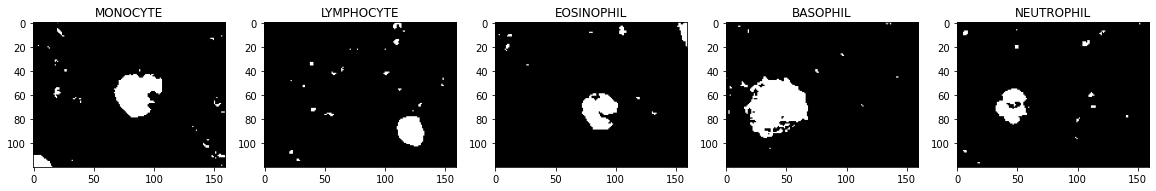

In [131]:
plot(dataset, 1)

In [132]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))
kernel

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

In [133]:
MON = importImages(dataset[0])
LYM = importImages(dataset[1])
EOS = importImages(dataset[2])
BAS = importImages(dataset[3])
NEU = importImages(dataset[4])

# DILASI

In [134]:
def Dilasi(image, kernel):
    padd = kernel.shape[0]//2
    row, col = image.shape
    dilImage = np.pad(np.zeros(image.shape), padd)

    for i in range(row):
        for j in range(col):
                if image[i][j]==255:
                    dilImage[i:i+kernel.shape[0], j:j+kernel.shape[0]] += kernel
    dilImage[dilImage>0] = 255
    return dilImage[padd:row, padd:col]


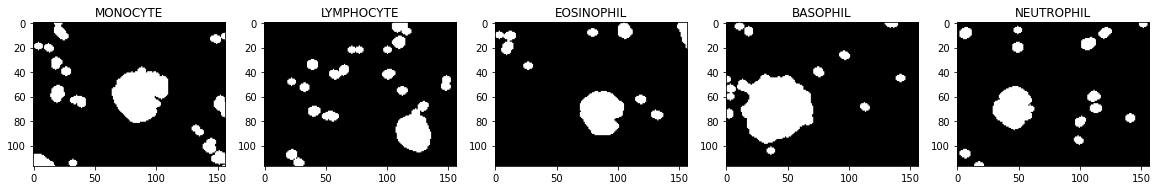

In [135]:
plot([Dilasi(MON, kernel), Dilasi(LYM, kernel), Dilasi(EOS, kernel), Dilasi(BAS, kernel), Dilasi(NEU, kernel)])

#  EROSI

In [136]:
def Erosi(image, kernel):
    padd = kernel.shape[0]//2
    row, col = image.shape
    jum = (kernel==0).sum()
    eroImage =np.pad(image, padd)
    eroImages = np.zeros(image.shape)

    for i in range(row):
        for j in range(col):
            if eroImage[i+padd, j+padd] == 255:
                sum_null = ((eroImage[i:i+kernel.shape[0], j:j+kernel.shape[0]]*kernel) == 0).sum()
                if jum == sum_null:
                    eroImages[i, j] = 255
    return eroImages


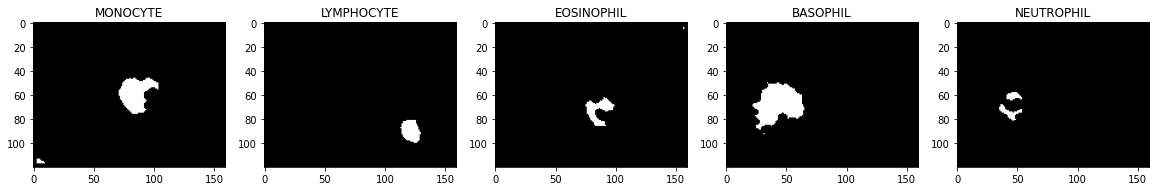

In [137]:
plot([Erosi(MON, kernel), Erosi(LYM, kernel), Erosi(EOS, kernel), Erosi(BAS, kernel), Erosi(NEU, kernel)])

# OPENING

In [138]:
def Opening(image):
    result = Erosi(image, kernel)
    opening = Dilasi(result, kernel)

    return opening


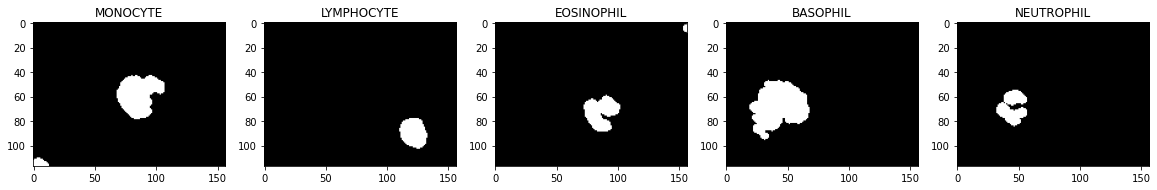

In [139]:
plot([Opening(MON), Opening(LYM), Opening(EOS), Opening(BAS), Opening(NEU)])

# CLOSING

In [142]:
def Closing(image):
    result = Dilasi(image, kernel)
    closing = Erosi(result, kernel)

    return closing

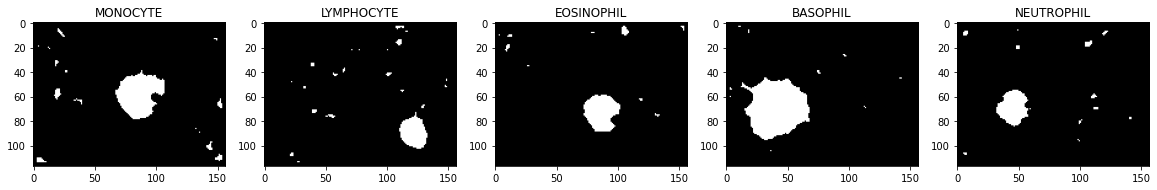

In [143]:
plot([Closing(MON), Closing(LYM), Closing(EOS), Closing(BAS), Closing(NEU)])

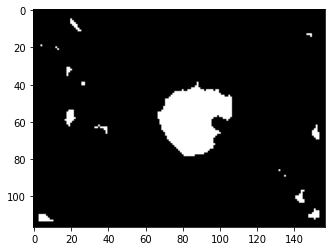

In [145]:
plt.imshow(Closing(MON), 'gray')